<a href="https://colab.research.google.com/github/shabana-sulthana123/Machine-Learning/blob/main/Linear_%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. loading the dataset and libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Preview
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Inscept and clean data

In [ ]:
# Check missing values
print(df.isnull().sum())

# Drop rows with missing 'age' or 'fare'
df_clean = df[['age', 'fare', 'sex', 'pclass']].dropna()

# Encode 'sex' column: male=0, female=1
df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})

# Final clean data
df_clean.head()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,age,fare,sex,pclass
0,22.0,7.2500,0,3
1,38.0,71.2833,1,1
2,26.0,7.9250,1,3
3,35.0,53.1000,1,1
4,35.0,8.0500,0,3


3. Univariate Histograms

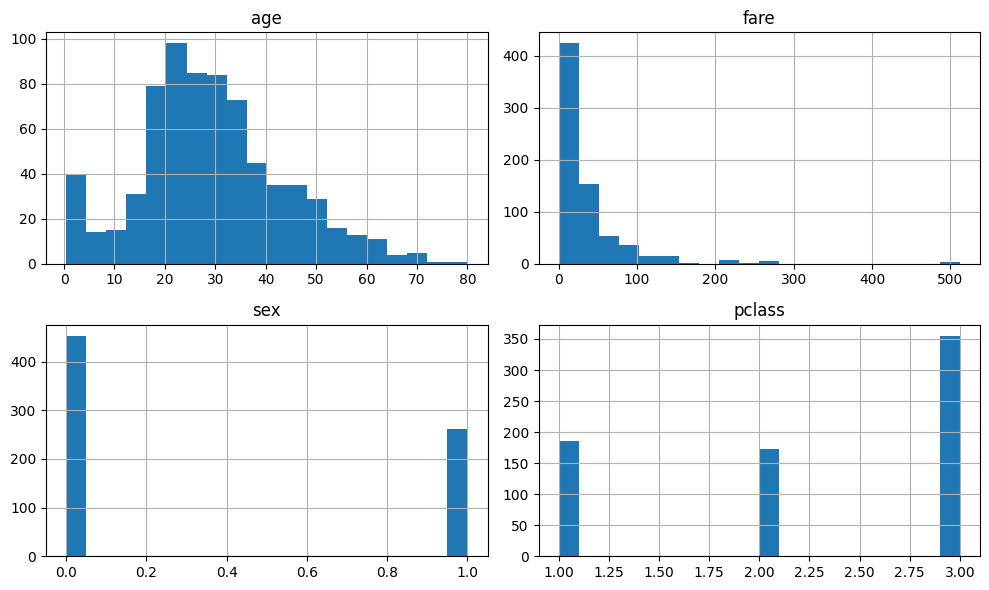

In [ ]:
df_clean.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


4. Single-Variable Linear Regression (Age → Fare)

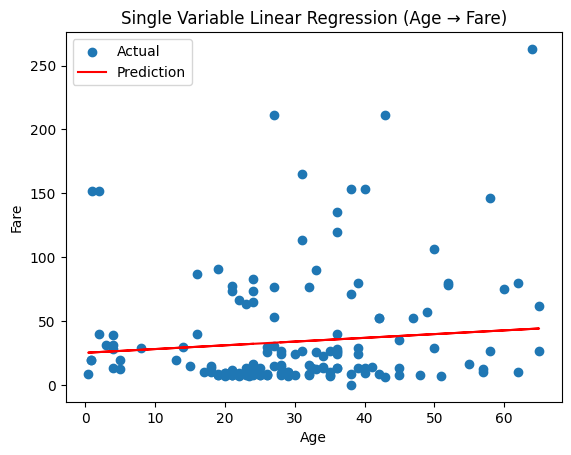

In [ ]:
X = df_clean[['age']]
y = df_clean['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Single Variable Linear Regression (Age → Fare)')
plt.legend()
plt.show()


5. Multi-variable Linear Regression

In [ ]:
features = ['age', 'sex', 'pclass']
X = df_clean[features]
y = df_clean['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))


R2 Score: 0.4358798532133794
RMSE: 34.926042015040686


6. Residual plot

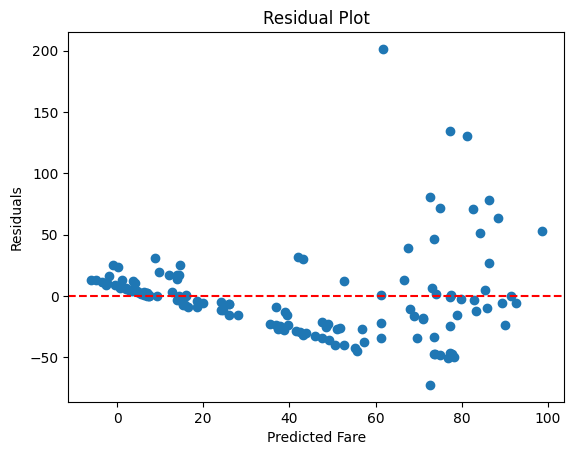

In [ ]:
residuals = y_test - y_pred_multi

plt.scatter(y_pred_multi, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


7. Polynomial Regression

Best degree: {'polynomialfeatures__degree': 1}


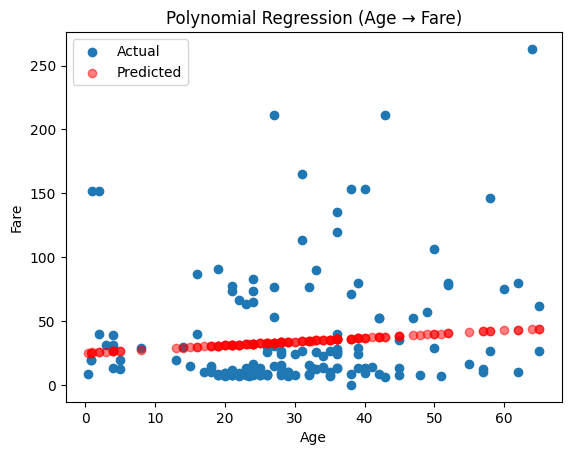

In [ ]:
X = df_clean[['age']]
y = df_clean['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pipeline
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Try degrees 1 to 4
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4]}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best degree:", grid.best_params_)

# Predict with best model
best_model = grid.best_estimator_
y_pred_poly = best_model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted', alpha=0.5)
plt.title('Polynomial Regression (Age → Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()
